<a href="https://colab.research.google.com/github/ginograf/DSF/blob/main/CodingTask1_Solutions_GinoGraf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-22 17:00
- Estimated effort: 2-5 hours (if you don't progress after 2 hours of trying, search for help, ChatGPT, Google, colleagues, course tutor)
- Data on Ilias: CCD-Data with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- **CT-1.1** Write a method (function) which removes the header information in the 
datafile and saves that information into a separate textfile. [0.5 points] 
- **CT-1.2** Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  
- **CT-1.3** Now generalize the above merging so that it works for any number nm er column. [2.0 points]
- **CT-1.4** Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]
- **CT-1.5** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points] 
- **CT-1.6** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]
- **CT-1.7** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

CT-1.1:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/CCD-Data.txt'

Mounted at /content/drive


In [21]:
df = pd.read_csv(path, delimiter=',')
df2 = pd.read_csv(path, delimiter='\t', header =13)
df_header = df.head(12)

In [5]:
from pickle import FALSE
with open('header_information.txt', 'w') as hi:
    df_headerinfo = df_header.to_string(header=FALSE, index=FALSE)
    hi.write(df_headerinfo)
with open('datafile.txt', 'w') as f:
  df_datafile = df2.to_string(header=FALSE, index=FALSE)
  f.write(df_datafile)

CT-1.2:

In [40]:
integer_df = df2.iloc[:,2:]
column_names = integer_df.columns.tolist()
new_column_names = []
i = 0
while i < len(column_names):
  new_column_names.append(int(float(column_names[i])))
  i += 1
integer_df.columns = new_column_names
reduced_df = integer_df2.groupby(integer_df2.columns, axis=1).mean()
reduced_df.insert(0, 'time', df2['Unnamed: 1'])
reduced_df

,time,316,317,318,319,320,321,322,323,324,...,771,772,773,774,775,776,777,778,779,780
0,1540456324789,0.329672,-0.166957,-0.064746,0.133130,0.123705,-0.249831,0.271327,-0.093151,-0.123458,...,-0.038555,-0.038021,-0.039290,-0.038654,-0.036496,-0.038835,-0.038145,-0.038333,-0.037679,-0.035545
1,1540456324878,-0.044412,-0.411839,-0.133472,2.032979,-0.387814,-0.031617,0.322955,1.744725,-0.051639,...,-0.038100,-0.038118,-0.038622,-0.038308,-0.036896,-0.039010,-0.038400,-0.037930,-0.037812,-0.038165
2,1540456324962,0.338219,-0.094507,-0.024912,0.061890,-0.226986,0.107871,0.121011,-0.208504,-0.418836,...,-0.038063,-0.038303,-0.039200,-0.038397,-0.036932,-0.038245,-0.037664,-0.037514,-0.037057,-0.036903
3,1540456325046,-0.049682,0.027980,-0.008338,-0.088350,0.070348,-0.013674,0.307321,0.159532,-0.047932,...,-0.037775,-0.037678,-0.038711,-0.038133,-0.036972,-0.038177,-0.037273,-0.036996,-0.036614,-0.036822
4,1540456325129,0.335086,-0.162378,-0.102281,0.045717,-0.088278,0.042099,0.304675,-0.261077,-0.009424,...,-0.038433,-0.038135,-0.038991,-0.038178,-0.037010,-0.038540,-0.038076,-0.037606,-0.038132,-0.035900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1540456354404,-0.048929,-0.438802,1.870540,-0.089910,0.026243,0.046500,0.342797,-0.024736,0.087382,...,-0.037537,-0.036913,-0.038062,-0.037199,-0.035328,-0.037879,-0.037486,-0.036303,-0.036122,-0.033582
351,1540456354488,0.851907,-0.282855,-0.039069,-0.227483,-0.140185,0.055663,0.211854,-0.064256,0.039251,...,-0.036774,-0.036255,-0.037614,-0.037000,-0.035254,-0.037384,-0.036114,-0.035518,-0.035928,-0.035408
352,1540456354576,0.329255,-0.074950,0.074278,-0.053091,-0.073518,0.004167,0.393093,-0.051061,0.048273,...,-0.037064,-0.037087,-0.037948,-0.036972,-0.035591,-0.036524,-0.036691,-0.036766,-0.036246,-0.035039
353,1540456354660,0.330061,-0.260591,-0.020120,0.093793,0.100177,0.134214,0.319046,0.029385,0.033831,...,-0.036520,-0.036748,-0.037822,-0.036839,-0.035118,-0.037559,-0.036426,-0.036488,-0.036505,-0.034496


CT-1.3:

In [ ]:
integer_df2 = df2.iloc[:,2:]
column_names2 = integer_df2.columns.tolist()
new_column_names2 = []
i = 0
while i < len(column_names2):
  new_column_names2.append(int(float(column_names2[i])))
  i += 1
integer_df2.columns = new_column_names
reduced_df2 = integer_df2.groupby(integer_df2.columns, axis=1).mean()
reduced_df_2nm = pd.DataFrame({})
a = 0
while a < len(reduced_df2.columns):
  reduced_df_2nm[reduced_df2.columns[a]] = reduced_df2.iloc[:,a]
  a += 2 #this number gives the nm steps
reduced_df_2nm.insert(0, 'time', df2['Unnamed: 1'])

In [ ]:
reduced_df_4nm = pd.DataFrame({})
a = 0
while a < len(reduced_df2.columns):
  reduced_df_4nm[reduced_df2.columns[a]] = reduced_df2.iloc[:,a]
  a += 4 #this number gives the nm steps
reduced_df_4nm.insert(0, 'time', df2['Unnamed: 1'])

CT-1.4:

In [41]:
%%timeit
with open('reduced_file_loop.txt', 'w') as rf:
  for column in reduced_df.columns:
    rf.write(column)
    rf.write('\t')
  rf.write('\n')
  row = 0    
  while row < 355:
      rf.write("\t".join(reduced_df.iloc[row,:].values.astype(str)))
      rf.write('\n')
      row += 1

299 ms ± 6.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
%%timeit
reduced_df.to_csv(r'reduced_dataset.txt', sep='\t', index= FALSE)

184 ms ± 28.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


CT-1.5:

570
550


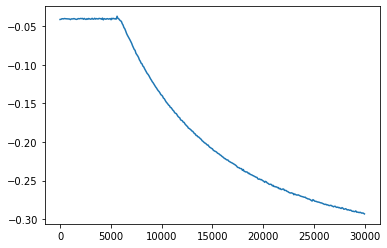

In [47]:
wavelength1 = int(input())
wavelength2 = int(input())  #takes two wavelengths as input
values_wl1 = reduced_df.iloc[:,wavelength1-315]
values_wl2 = reduced_df.iloc[:,wavelength2-315]
if wavelength1 > 780 or wavelength1 < 316 or wavelength2 > 780 or wavelength2 < 316:
  print('Both numbers must be in range from 316-780')
else:
  if wavelength1 > wavelength2:
    y_values = values_wl1-values_wl2  #gives difference of both wavelengths
    x_values = reduced_df.iloc[:,0] - reduced_df.iloc[0,0] #gives time in miliseconds
    plt.plot(x_values, y_values)
  elif wavelength2 > wavelength1:
    y_values = values_wl2-values_wl1
    x_values = reduced_df.iloc[:,0] - reduced_df.iloc[0,0] #gives time in miliseconds
    plt.plot(x_values, y_values)
  else: 
    print('The two numbers should be different')

CT-1.6:

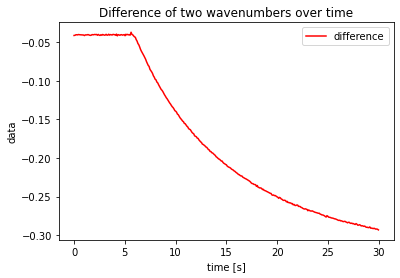

In [48]:
x_val_sec = x_values / 1000 #time in seconds
plt.plot(x_val_sec, y_values, 'r', label= 'difference')
plt.xlabel("time [s]")
plt.ylabel("data")
plt.title('Difference of two wavenumbers over time')
plt.legend()
plt.savefig('CCD-Data_plot.png')
plt.show()

CT-1.7:

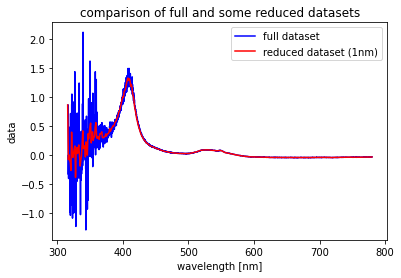

In [86]:
a = list(df2.columns[2:])
x_full = [eval(i) for i in a]
y_full = list(df2.iloc[80,2:])

b = list(reduced_df.columns[1:])
x_1nm = [eval(i) for i in b]
y_1nm = list(reduced_df.iloc[80,1:])

plt.plot(x_full, y_full, 'b', label='full dataset')
plt.plot(x_1nm, y_1nm, 'r', label='reduced dataset (1nm)')
plt.xlabel('wavelength [nm]')
plt.ylabel('data')
plt.title('comparison of full and some reduced datasets')
plt.legend()
plt.show()

It is visible that the more reduced the dataset, the smaller the fluctuations of the function (especially in region 300-400 nm). Beside that the functions look very similar. A resolution as high as the full dataset is therefore not absolutely necessary. The course of the curve ist still the same.